In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

# ---- paths ----
BASE_DIR = os.getcwd()                       # current notebook folder
DATA_PATH = os.path.abspath(BASE_DIR + '/../data/activity_energy.csv')
FIG_PATH  = os.path.abspath(BASE_DIR + '/../outputs')

print("BASE_DIR:", BASE_DIR)
print("DATA_PATH:", DATA_PATH)
print("FIG_PATH:", FIG_PATH)

# ---- load ----
df_initial = pd.read_csv(DATA_PATH)
df_initial.head()


BASE_DIR: C:\Users\feba thankam moni\Desktop\smart_activity_project\data
DATA_PATH: C:\Users\feba thankam moni\Desktop\smart_activity_project\data\activity_energy.csv
FIG_PATH: C:\Users\feba thankam moni\Desktop\smart_activity_project\outputs


,home_id,timestamp,device_id,device_type,room,status,power_watt,user_present,activity,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
0,1,2022-01-01 00:00:00,air_conditioner1,air_conditioner,bedroom,off,0.00,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
1,1,2022-01-01 00:00:00,light1,light,living_room,on,105.88,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
2,1,2022-01-01 00:00:00,tv1,tv,living_room,off,0.00,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
3,1,2022-01-01 00:00:00,fridge1,fridge,kitchen,on,223.46,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
4,1,2022-01-01 00:00:00,washer1,washer,laundry_room,off,0.00,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500


In [10]:
print(df_initial.columns)
df_initial.info()
print("Shape:", df_initial.shape)


Index(['home_id', 'timestamp', 'device_id', 'device_type', 'room', 'status',
       'power_watt', 'user_present', 'activity', 'indoor_temp', 'outdoor_temp',
       'humidity', 'light_level', 'day_of_week', 'hour_of_day', 'price_kWh'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752000 entries, 0 to 1751999
Data columns (total 16 columns):
 #   Column        Dtype  
---  ------        -----  
 0   home_id       int64  
 1   timestamp     object 
 2   device_id     object 
 3   device_type   object 
 4   room          object 
 5   status        object 
 6   power_watt    float64
 7   user_present  int64  
 8   activity      object 
 9   indoor_temp   float64
 10  outdoor_temp  float64
 11  humidity      float64
 12  light_level   float64
 13  day_of_week   int64  
 14  hour_of_day   int64  
 15  price_kWh     int64  
dtypes: float64(5), int64(5), object(6)
memory usage: 213.9+ MB
Shape: (1752000, 16)


In [11]:
df_initial['timestamp'] = pd.to_datetime(df_initial['timestamp'])
df_initial.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752000 entries, 0 to 1751999
Data columns (total 16 columns):
 #   Column        Dtype         
---  ------        -----         
 0   home_id       int64         
 1   timestamp     datetime64[ns]
 2   device_id     object        
 3   device_type   object        
 4   room          object        
 5   status        object        
 6   power_watt    float64       
 7   user_present  int64         
 8   activity      object        
 9   indoor_temp   float64       
 10  outdoor_temp  float64       
 11  humidity      float64       
 12  light_level   float64       
 13  day_of_week   int64         
 14  hour_of_day   int64         
 15  price_kWh     int64         
dtypes: datetime64[ns](1), float64(5), int64(5), object(5)
memory usage: 213.9+ MB


In [12]:
for col in df_initial.columns:
    print(col)
    print(df_initial[col].isnull().value_counts())
    print()


home_id
home_id
False    1752000
Name: count, dtype: int64

timestamp
timestamp
False    1752000
Name: count, dtype: int64

device_id
device_id
False    1752000
Name: count, dtype: int64

device_type
device_type
False    1752000
Name: count, dtype: int64

room
room
False    1752000
Name: count, dtype: int64

status
status
False    1752000
Name: count, dtype: int64

power_watt
power_watt
False    1752000
Name: count, dtype: int64

user_present
user_present
False    1752000
Name: count, dtype: int64

activity
activity
False    1752000
Name: count, dtype: int64

indoor_temp
indoor_temp
False    1752000
Name: count, dtype: int64

outdoor_temp
outdoor_temp
False    1752000
Name: count, dtype: int64

humidity
humidity
False    1752000
Name: count, dtype: int64

light_level
light_level
False    1752000
Name: count, dtype: int64

day_of_week
day_of_week
False    1752000
Name: count, dtype: int64

hour_of_day
hour_of_day
False    1752000
Name: count, dtype: int64

price_kWh
price_kWh
False    1

In [13]:
df_initial['device_type'].value_counts()


device_type
air_conditioner    350400
light              350400
tv                 350400
fridge             350400
washer             350400
Name: count, dtype: int64

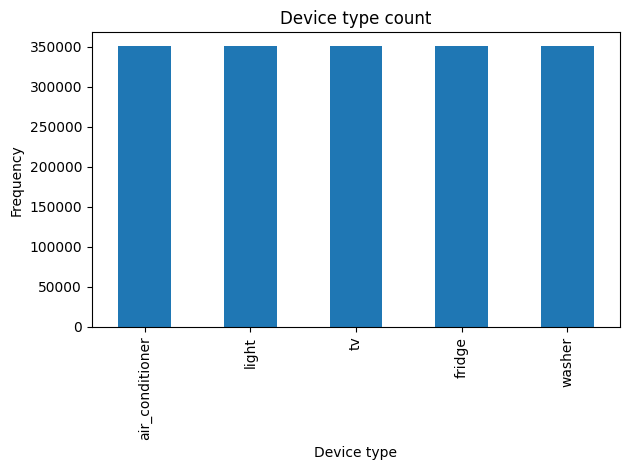

In [14]:
df_initial['device_type'].value_counts().plot(kind='bar')
plt.title('Device type count')
plt.xlabel('Device type')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(FIG_PATH + '/device_type_counts.png')
plt.show()


In [15]:
df_unique_ts = df_initial.drop_duplicates(subset='timestamp')['timestamp']
print("Unique timestamps:", len(df_unique_ts))

print(df_unique_ts.diff().value_counts().head())

full_range = pd.date_range(start=df_unique_ts.min(),
                           end=df_unique_ts.max(),
                           freq='15min')   # 15-minute logging
missing = full_range.difference(df_unique_ts)
print("Missing timestamps:", missing)


Unique timestamps: 35040
timestamp
0 days 00:15:00    35039
Name: count, dtype: int64
Missing timestamps: DatetimeIndex([], dtype='datetime64[ns]', freq='15min')


In [16]:
# power_watt is W (J/s); 15 min = 0.25 hours
df_initial['energy_kWh'] = (df_initial['power_watt'] * 0.25) / 1000.0
df_initial[['power_watt', 'energy_kWh']].head()


,power_watt,energy_kWh
0,0.00,0.000000
1,105.88,0.026470
2,0.00,0.000000
3,223.46,0.055865
4,0.00,0.000000


In [17]:
(df_initial['energy_kWh'] < 0).value_counts()


energy_kWh
False    1752000
Name: count, dtype: int64

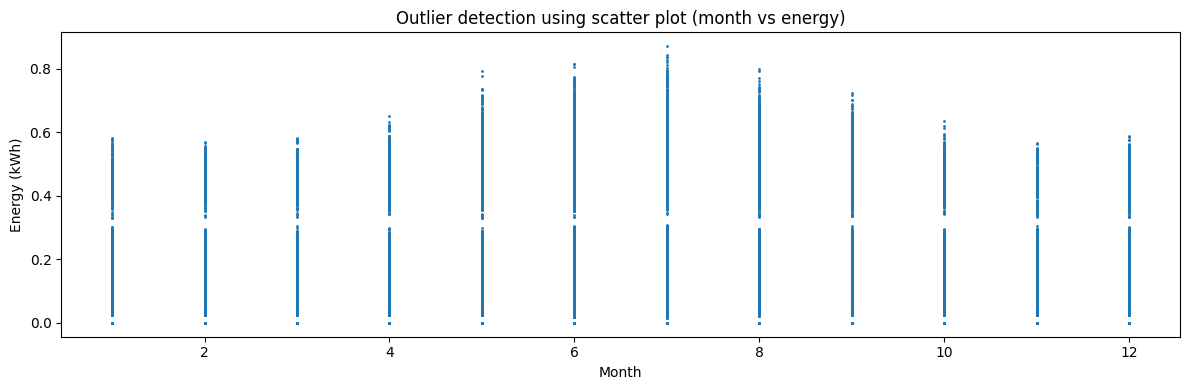

In [18]:
plt.figure(figsize=(12,4))
plt.scatter(df_initial['timestamp'].dt.month, df_initial['energy_kWh'], s=1)
plt.title("Outlier detection using scatter plot (month vs energy)")
plt.xlabel('Month')
plt.ylabel('Energy (kWh)')
plt.tight_layout()
plt.savefig(FIG_PATH + '/energy_month_scatter.png')
plt.show()


                 energy_kWh
device_type                
air_conditioner    13001.83
fridge             23248.45
light               3539.48
tv                  7448.75
washer              5315.65


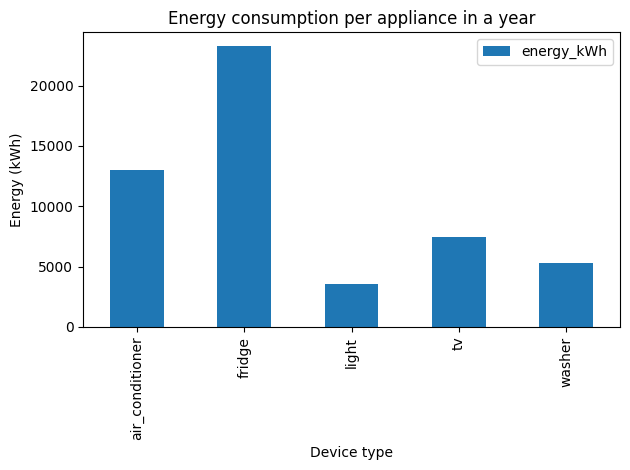

In [19]:
df_subset1 = df_initial.pivot_table(
    index='device_type',
    values='energy_kWh',
    aggfunc='sum'
)
print(df_subset1.round(2))

df_subset1.plot(kind='bar')
plt.title('Energy consumption per appliance in a year')
plt.xlabel('Device type')
plt.ylabel('Energy (kWh)')
plt.tight_layout()
plt.savefig(FIG_PATH + '/energy_appliance_year.png')
plt.show()


device_type  air_conditioner   fridge    light       tv   washer
activity                                                        
away                  803.07  4821.68   153.43   350.79   700.70
cooking              3871.85  3937.49  1276.43   296.00  1084.80
idle                 2470.21  2071.30   152.74   150.47   572.87
sleeping             1400.06  7989.06   231.36   559.09  1661.87
watching_tv          4456.64  4428.91  1725.52  6092.40  1295.40


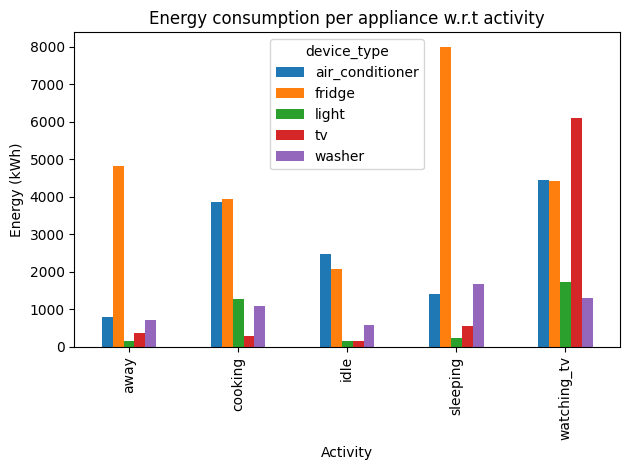

In [20]:
df_subset2 = df_initial.pivot_table(
    index='activity',
    columns='device_type',
    values='energy_kWh',
    aggfunc='sum'
)
print(df_subset2.round(2))

df_subset2.plot(kind='bar')
plt.title('Energy consumption per appliance w.r.t activity')
plt.xlabel('Activity')
plt.ylabel('Energy (kWh)')
plt.tight_layout()
plt.savefig(FIG_PATH + '/energy_device_activity.png')
plt.show()


device_type   air_conditioner    fridge    light       tv   washer
user_present                                                      
0                      803.07   4821.68   153.43   350.79   700.70
1                    12198.76  18426.76  3386.05  7097.96  4614.94


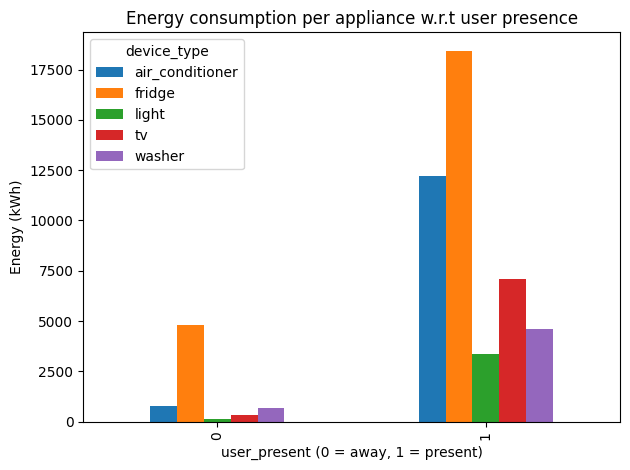

In [21]:
df_subset3 = df_initial.pivot_table(
    index='user_present',
    columns='device_type',
    values='energy_kWh',
    aggfunc='sum'
)
print(df_subset3.round(2))

df_subset3.plot(kind='bar')
plt.title('Energy consumption per appliance w.r.t user presence')
plt.xlabel('user_present (0 = away, 1 = present)')
plt.ylabel('Energy (kWh)')
plt.tight_layout()
plt.savefig(FIG_PATH + '/energy_device_user_presence.png')
plt.show()


device_type  air_conditioner    fridge    light       tv   washer
status                                                           
off                     0.00       NaN     0.00     0.00     0.00
on                  13001.83  23248.45  3539.48  7448.75  5315.65


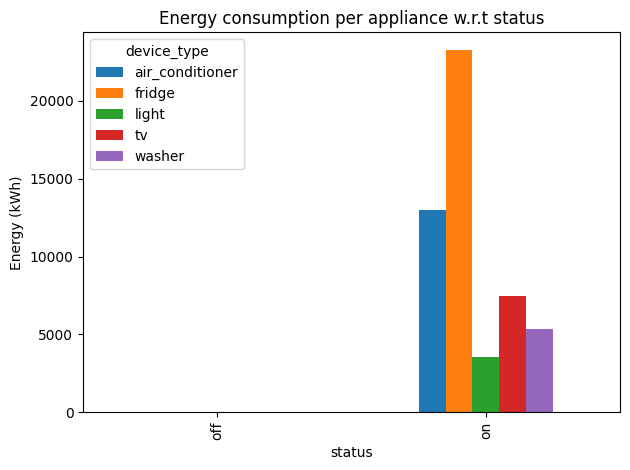

In [22]:
df_subset4 = df_initial.pivot_table(
    index='status',
    columns='device_type',
    values='energy_kWh',
    aggfunc='sum'
)
print(df_subset4.round(2))

df_subset4.plot(kind='bar')
plt.title('Energy consumption per appliance w.r.t status')
plt.xlabel('status')
plt.ylabel('Energy (kWh)')
plt.tight_layout()
plt.savefig(FIG_PATH + '/energy_device_status.png')
plt.show()


device_type  air_conditioner   fridge   light       tv  washer
hour_of_day                                                   
0                     158.53  1000.05   97.34    70.82  139.99
1                     142.36  1002.17   30.89    69.48  141.92
2                     153.64  1000.74   30.10    69.47  126.74
3                     152.70  1005.37   28.04    71.74  139.75
4                     144.41   996.14   29.27    71.70  142.34
5                     138.14   999.31   68.53    69.61  145.22
6                     141.96  1000.57  233.94    71.42  387.80
7                     182.06  1001.42  168.40    74.26  387.77
8                     275.64   994.88   30.90   156.07  246.50
9                     383.66   985.69   28.23   287.43  140.34
10                    524.43   967.43   29.19   322.85  136.31
11                    662.08   946.19   30.85   317.42  134.69
12                    748.38   933.28   28.89   314.42  211.03
13                    789.10   912.90   29.57   320.85 

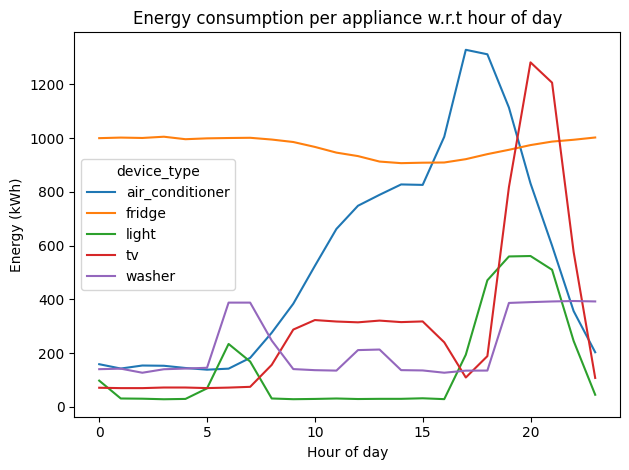

In [23]:
df_subset5 = df_initial.pivot_table(
    index='hour_of_day',
    columns='device_type',
    values='energy_kWh',
    aggfunc='sum'
)
print(df_subset5.round(2))

df_subset5.plot(kind='line')
plt.title('Energy consumption per appliance w.r.t hour of day')
plt.xlabel('Hour of day')
plt.ylabel('Energy (kWh)')
plt.tight_layout()
plt.savefig(FIG_PATH + '/energy_device_hour.png')
plt.show()


In [24]:
df_room = df_initial.pivot_table(
    index='room',
    columns='device_type',
    values='energy_kWh',
    aggfunc='sum'
)
print(df_room.round(2))


device_type   air_conditioner    fridge    light       tv   washer
room                                                              
bedroom              13001.83       NaN      NaN      NaN      NaN
kitchen                   NaN  23248.45      NaN      NaN      NaN
laundry_room              NaN       NaN      NaN      NaN  5315.65
living_room               NaN       NaN  3539.48  7448.75      NaN


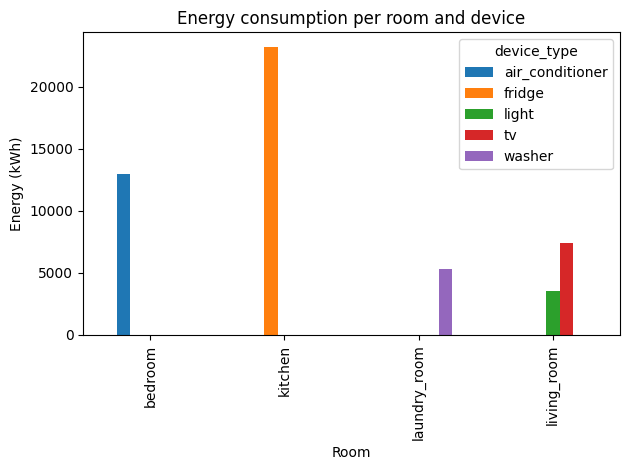

In [25]:
df_room.plot(kind='bar')
plt.title('Energy consumption per room and device')
plt.xlabel('Room')
plt.ylabel('Energy (kWh)')
plt.tight_layout()
plt.savefig(FIG_PATH + '/energy_device_room.png')
plt.show()


device_type  air_conditioner   fridge   light       tv  washer
day_of_week                                                   
Monday               1471.41  3298.33  541.05  1072.53  738.38
Tuesday              1490.25  3313.36  521.87  1057.42  730.77
Wednesday            1524.76  3311.07  509.49  1064.57  726.06
Thursday             1571.67  3326.80  496.72  1058.90  724.06
Friday               1572.81  3310.20  498.31  1062.52  722.74
Saturday             2689.86  3384.52  492.65  1075.67  847.47
Sunday               2681.08  3304.16  479.40  1057.14  826.18


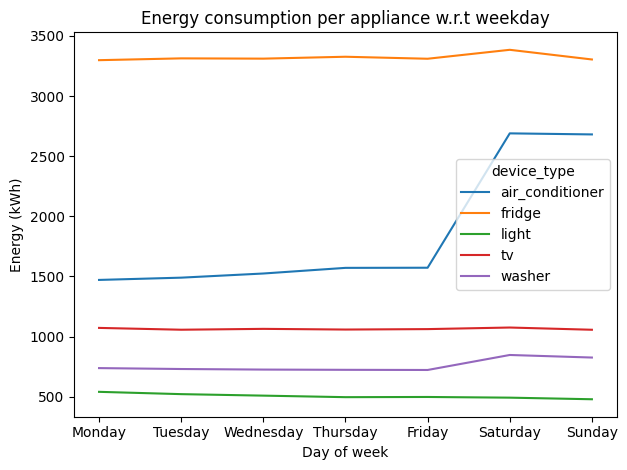

In [26]:
df_subset6 = df_initial.pivot_table(
    index='day_of_week',
    columns='device_type',
    values='energy_kWh',
    aggfunc='sum'
)

weekdays = {
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday',
    3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'
}
df_subset6.index = df_subset6.index.map(weekdays)
print(df_subset6.round(2))

df_subset6.plot(kind='line')
plt.title('Energy consumption per appliance w.r.t weekday')
plt.xlabel('Day of week')
plt.ylabel('Energy (kWh)')
plt.tight_layout()
plt.savefig(FIG_PATH + '/energy_device_weekday.png')
plt.show()


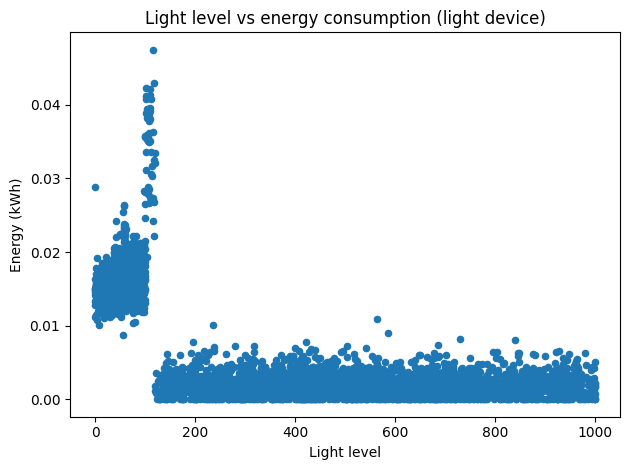

In [27]:
df_light = df_initial[df_initial['device_type'] == 'light']
df_light_plot = df_light.pivot_table(
    index='light_level',
    values='energy_kWh',
    aggfunc='mean'
).reset_index()

df_light_plot.plot(kind='scatter', x='light_level', y='energy_kWh')
plt.title('Light level vs energy consumption (light device)')
plt.xlabel('Light level')
plt.ylabel('Energy (kWh)')
plt.tight_layout()
plt.savefig(FIG_PATH + '/light_level_vs_energy_light.png')
plt.show()


In [28]:
df_initial['price_kWh'].describe()

for col in df_initial.columns:
    if col != 'energy_kWh' and (df_initial[col].dtype != 'O'):
        print(df_initial[[col, 'energy_kWh']].corr())
        print()


             home_id  energy_kWh
home_id     1.000000   -0.046145
energy_kWh -0.046145    1.000000

            timestamp  energy_kWh
timestamp    1.000000    0.008793
energy_kWh   0.008793    1.000000

            power_watt  energy_kWh
power_watt         1.0         1.0
energy_kWh         1.0         1.0

              user_present  energy_kWh
user_present      1.000000    0.108452
energy_kWh        0.108452    1.000000

             indoor_temp  energy_kWh
indoor_temp     1.000000    0.136976
energy_kWh      0.136976    1.000000

              outdoor_temp  energy_kWh
outdoor_temp      1.000000    0.136327
energy_kWh        0.136327    1.000000

            humidity  energy_kWh
humidity    1.000000   -0.044761
energy_kWh -0.044761    1.000000

             light_level  energy_kWh
light_level     1.000000    0.019396
energy_kWh      0.019396    1.000000

             day_of_week  energy_kWh
day_of_week     1.000000    0.031299
energy_kWh      0.031299    1.000000

             hour_o

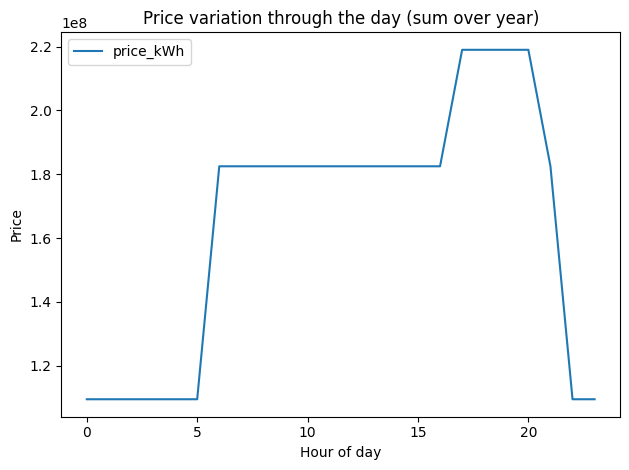

In [29]:
df_price_hour = df_initial.pivot_table(
    index='hour_of_day',
    values='price_kWh',
    aggfunc='sum'
)

df_price_hour.plot(kind='line')
plt.title('Price variation through the day (sum over year)')
plt.xlabel('Hour of day')
plt.ylabel('Price')
plt.tight_layout()
plt.savefig(FIG_PATH + '/price_hour.png')
plt.show()


In [30]:
df_initial.drop('price_kWh', axis=1, inplace=True)


In [31]:
on_sample   = df_initial[df_initial['status'] == 'on'].sample(100000, random_state=42)
off_sample  = df_initial[df_initial['status'] == 'off'].sample(100000, random_state=42)

user_p_sample = df_initial[df_initial['user_present'] == 1].sample(100000, random_state=42)
user_a_sample = df_initial[df_initial['user_present'] == 0].sample(100000, random_state=42)

sleeping_s = df_initial[df_initial['activity'] == 'sleeping'].sample(100000, random_state=42)
away_s     = df_initial[df_initial['activity'] == 'away'].sample(100000, random_state=42)
watch_s    = df_initial[df_initial['activity'] == 'watching_tv'].sample(100000, random_state=42)
cook_s     = df_initial[df_initial['activity'] == 'cooking'].sample(100000, random_state=42)
idle_s     = df_initial[df_initial['activity'] == 'idle'].sample(100000, random_state=42)

df_status_balanced = pd.concat([on_sample, off_sample])
df_user_balanced   = pd.concat([user_p_sample, user_a_sample])
df_activity_balanced = pd.concat([sleeping_s, away_s, watch_s, cook_s, idle_s])


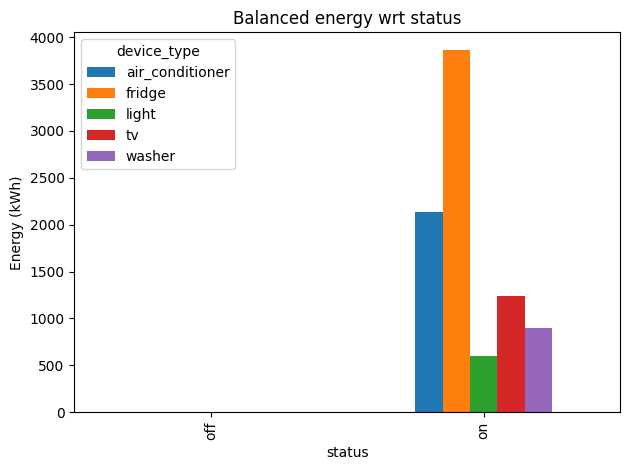

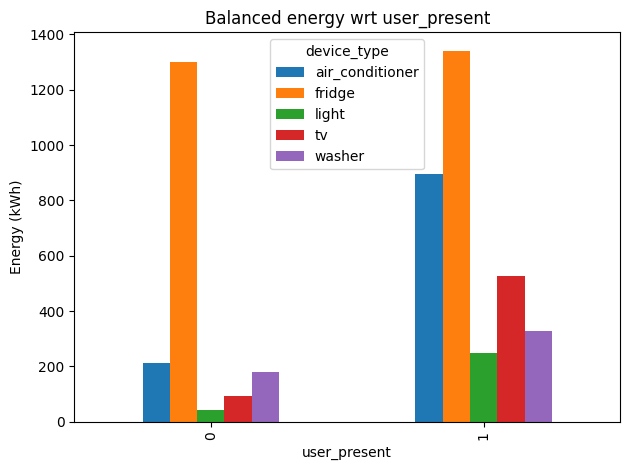

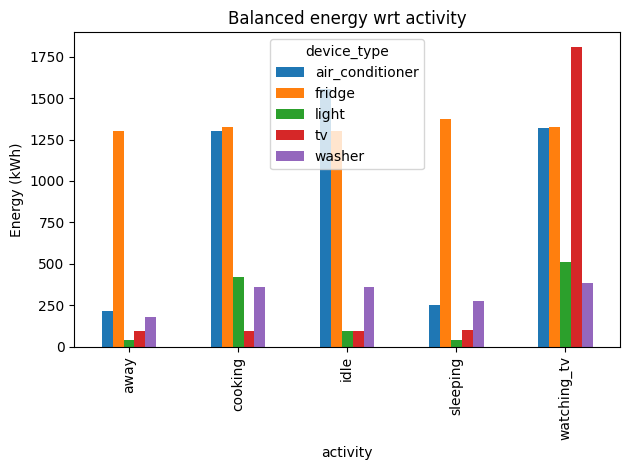

In [32]:
# 1. status
pivot1 = df_status_balanced.pivot_table(
    index='status',
    columns='device_type',
    values='energy_kWh',
    aggfunc='sum'
)
pivot1.plot(kind='bar')
plt.title('Balanced energy wrt status')
plt.xlabel('status')
plt.ylabel('Energy (kWh)')
plt.tight_layout()
plt.savefig(FIG_PATH + '/balanced_status.png')
plt.show()

# 2. user_present
pivot2 = df_user_balanced.pivot_table(
    index='user_present',
    columns='device_type',
    values='energy_kWh',
    aggfunc='sum'
)
pivot2.plot(kind='bar')
plt.title('Balanced energy wrt user_present')
plt.xlabel('user_present')
plt.ylabel('Energy (kWh)')
plt.tight_layout()
plt.savefig(FIG_PATH + '/balanced_user_present.png')
plt.show()

# 3. activity
pivot3 = df_activity_balanced.pivot_table(
    index='activity',
    columns='device_type',
    values='energy_kWh',
    aggfunc='sum'
)
pivot3.plot(kind='bar')
plt.title('Balanced energy wrt activity')
plt.xlabel('activity')
plt.ylabel('Energy (kWh)')
plt.tight_layout()
plt.savefig(FIG_PATH + '/balanced_activity.png')
plt.show()


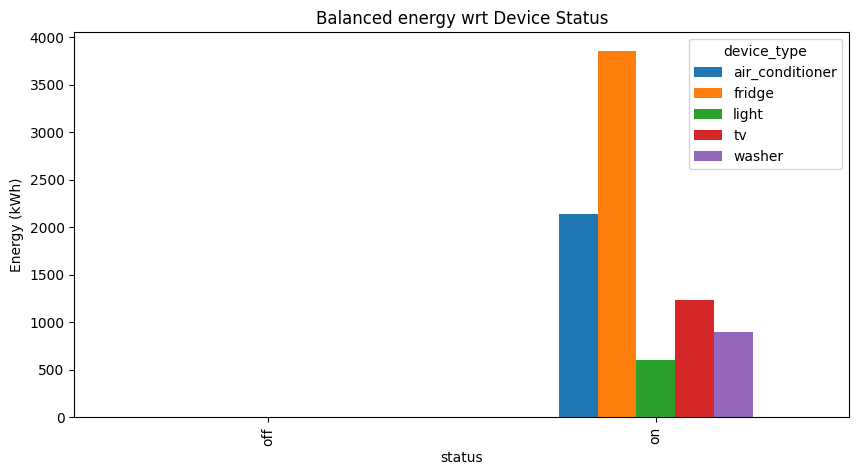

In [33]:
pivot_status = df_status_balanced.pivot_table(
    index='status', 
    columns='device_type', 
    values='energy_kWh',
    aggfunc='sum'
)

pivot_status.plot(kind='bar', figsize=(10,5))
plt.title("Balanced energy wrt Device Status")
plt.xlabel('status')
plt.ylabel('Energy (kWh)')
plt.show()
